# Importing the libraries

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import scipy.stats as stats 
%matplotlib inline
from sklearn.model_selection import train_test_split
import sklearn.model_selection as cross_validation
from sklearn.model_selection import cross_val_score
import os,random,math
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

# Evaluation
from sklearn.metrics import classification_report, accuracy_score, average_precision_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Preprocessing
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro

In [2]:
#Filtering warnings
import warnings

warnings.filterwarnings("ignore")

# Loading the dataset

In [3]:
filepath='DryBeanDataset'
def get_dataset(training_dir=filepath):
    #loading filename in filepath
    filenames=os.listdir(training_dir)
    n=len(filenames)
    print("There are {} files in the directory: {}".format(n,training_dir))
    return filenames

In [4]:
filename=get_dataset()
filename

There are 3 files in the directory: DryBeanDataset


['Dry_Bean_Dataset.arff', 'Dry_Bean_Dataset.txt', 'Dry_Bean_Dataset.xlsx']

In [5]:
import pandas as pd
#reading csv files
def read_tsvfiles(filename):
    csv_filename= os.path.join(filepath,'Dry_Bean_Dataset.xlsx')
    df = pd.read_excel(csv_filename)
    df.reset_index()
    return df  

In [6]:
df=read_tsvfiles(filepath)
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [7]:
#creating a column ID with index value
df['ID']=df.index
df[['ID']]

,ID
0,0
1,1
2,2
3,3
4,4
...,...
13606,13606
13607,13607
13608,13608
13609,13609


# Exploratory Data Analysis

Data Summarization

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
 17  ID          

In [9]:
#Checking if there is null value in dataset
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
ID                 0
dtype: int64

In [10]:
#Counting number of rows for each class
df["Class"].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [11]:
#Checking if there is any duplicate values in dataset
df.duplicated().sum()

0

In [12]:
df.size

244998

In [13]:
df.shape

(13611, 18)

In [14]:
#Obtaining statistical summary
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ID
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063,6805.000000
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366,3929.301592
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687,0.000000
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703,3402.500000
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386,6805.000000
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883,10207.500000
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733,13610.000000


In [15]:
# Finding correlation between features
df.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ID
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721,-0.369273
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310,-0.411175
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527,-0.324677
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749,-0.502747
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264,0.139467
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354,0.308182
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049,-0.369615
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512,-0.418614
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502,-0.099929
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163,0.087182


In [16]:
data_beans=df.copy()

Encoding target label into integers

In [17]:
#Encoding target label into int
la_en = LabelEncoder()
df['Class'] = la_en.fit_transform(df['Class'])
df.index

RangeIndex(start=0, stop=13611, step=1)

In [18]:
dry_bean_data=df.copy()
dry_bean_data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,ID
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5,1
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5,2
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5,3
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,3,13606
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,3,13607
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,3,13608
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,3,13609


In [19]:
dry_bean_data["Class"].value_counts()

3    3546
6    2636
5    2027
4    1928
2    1630
0    1322
1     522
Name: Class, dtype: int64

Data Visualization

In [20]:
#For each class storing rows it into different dataframe 
der_df=data_beans[data_beans['Class']=='DERMASON']
sir_df=data_beans[data_beans['Class']=='SIRA']
sek_df=data_beans[data_beans['Class']=='SERKAN']
hor_df=data_beans[data_beans['Class']=='HOROZ']
cali_df=data_beans[data_beans['Class']=='CALI']
bar_df=data_beans[data_beans['Class']=='BARBUNYA']
bom_df=data_beans[data_beans['Class']=='BOMBAR']

<Axes: xlabel='Perimeter', ylabel='EquivDiameter'>

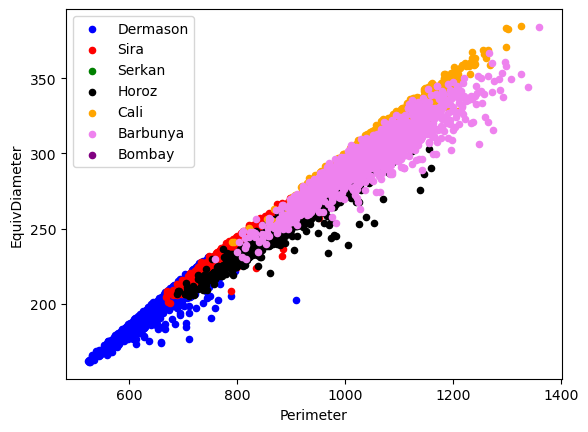

In [21]:
#Plotting scatter plot between Perimeter and EquivDiameter
axes = der_df.plot(kind='scatter',x='Perimeter',y='EquivDiameter',color='blue',label='Dermason')
sir_df.plot(kind='scatter',x='Perimeter',y='EquivDiameter',color='red',label='Sira',ax=axes)
sek_df.plot(kind='scatter',x='Perimeter',y='EquivDiameter',color='green',label='Serkan',ax=axes)
hor_df.plot(kind='scatter',x='Perimeter',y='EquivDiameter',color='black',label='Horoz',ax=axes)
cali_df.plot(kind='scatter',x='Perimeter',y='EquivDiameter',color='orange',label='Cali',ax=axes)
bar_df.plot(kind='scatter',x='Perimeter',y='EquivDiameter',color='violet',label='Barbunya',ax=axes)
bom_df.plot(kind='scatter',x='Perimeter',y='EquivDiameter',color='purple',label='Bombay',ax=axes)

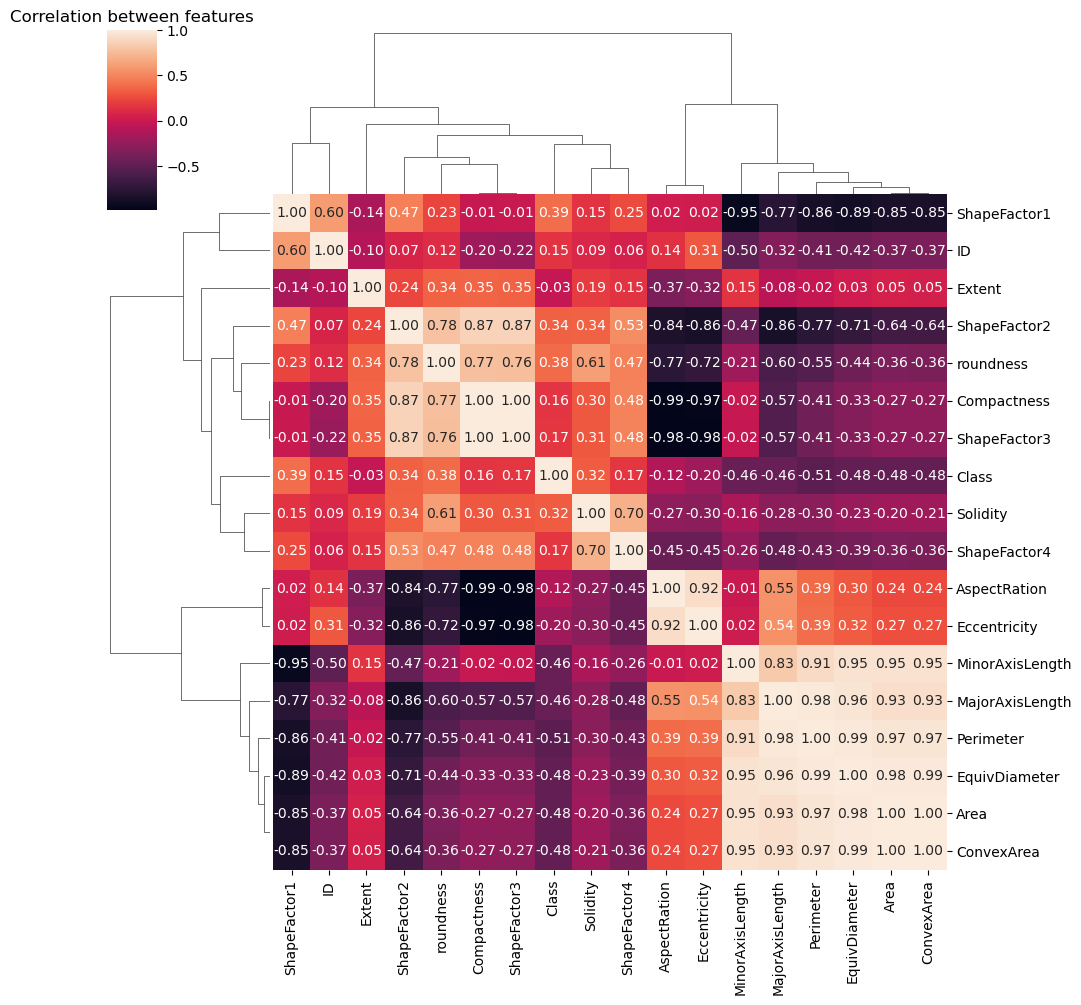

In [22]:
#Plotting cluster map
corr_matrix = dry_bean_data.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation between features")
plt.show()

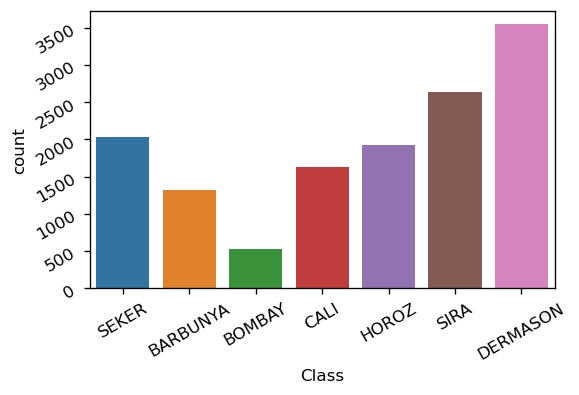

In [23]:
#plotting bargraph to visualise count of each class
fig, ax = plt.subplots(1, figsize=(5, 3), dpi=120)
ax.tick_params(axis='both', rotation=30)
cplot = sns.countplot(x=data_beans['Class'], ax=ax);
cplot.set_xticklabels(cplot.get_xticklabels(), rotation = 30, );

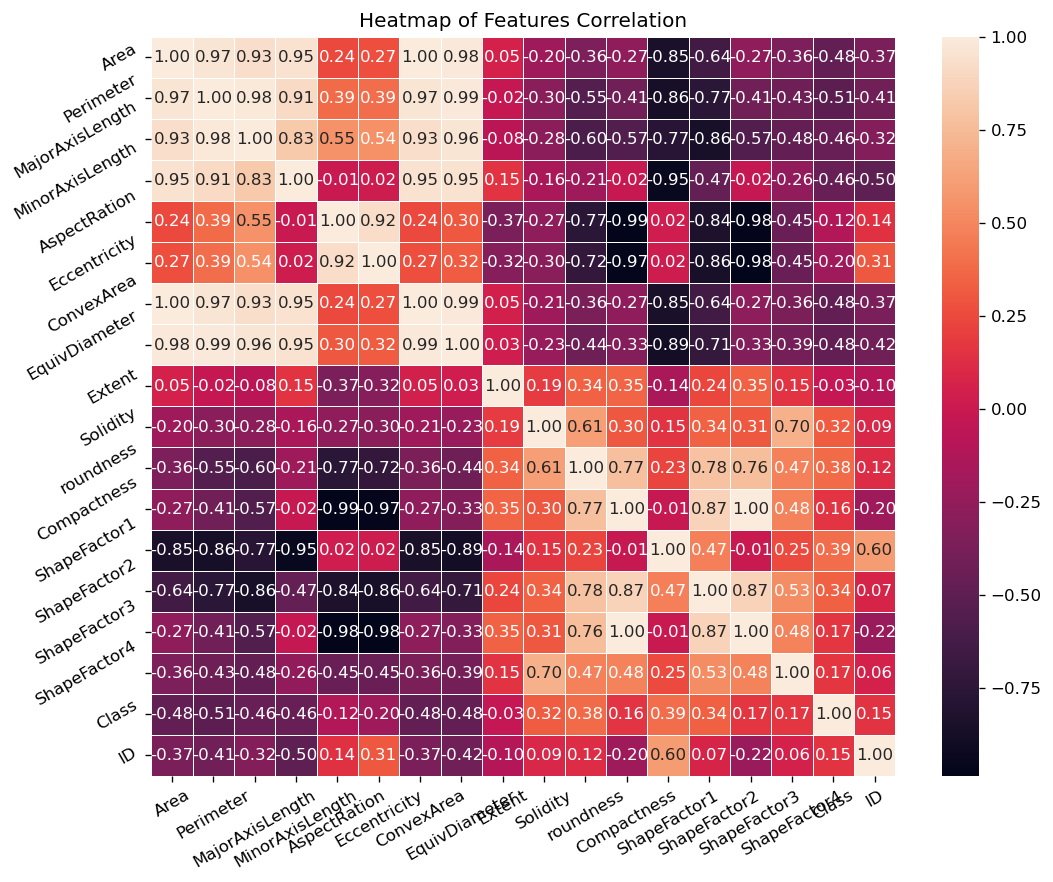

In [24]:
#plotting heatmap of Features Correlation
corr_mat = df.corr()
plt.subplots(figsize = (10, 8), dpi=120)
plt.title('Heatmap of Features Correlation')
hmap = sns.heatmap(corr_mat, linewidth = 0.5, fmt='.2f', annot=True)
hmap.set_yticklabels(hmap.get_yticklabels(), rotation = 30)
hmap.set_xticklabels(hmap.get_xticklabels(), rotation = 30);

# Data Preprocessing

In [25]:
bean_data=dry_bean_data.copy()
#removing class column
feature_df=dry_bean_data.drop(['Class'],axis=1)
feature_df
# Considering only class column for y
class_df=dry_bean_data[['Class']]
class_df
#Considering only features for x
features=feature_df.copy()
features=features[['Area','Perimeter','MajorAxisLength','MinorAxisLength','AspectRation','Eccentricity','ConvexArea','EquivDiameter','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4']]
features
ids = feature_df.iloc[:, -1]
ids

0            0
1            1
2            2
3            3
4            4
         ...  
13606    13606
13607    13607
13608    13608
13609    13609
13610    13610
Name: ID, Length: 13611, dtype: int64

Standardize the features

In [26]:
from sklearn import preprocessing
#Standardize the data in features
normalizer = preprocessing.StandardScaler()
norm_X = normalizer.fit_transform(features)

Splitting Dataset into Test and Training sets

In [27]:
#splitting training, testing set, id
x_train,x_test,y_train,y_test, ids_train, ids_test=train_test_split(norm_X,class_df['Class'],ids,test_size=0.20, random_state=8)

In [28]:
ids_test

2894      2894
3683      3683
8012      8012
199        199
13545    13545
         ...  
13551    13551
13260    13260
6281      6281
6876      6876
3247      3247
Name: ID, Length: 2723, dtype: int64

# Model Creation

In [29]:
#Caluculate performance of model
def predict_metrics(model,x_test,y_test):
    # predicting the class of test set
    y_pred=model.predict(x_test)
    # Transforming labels back to original encoding
    y=la_en.inverse_transform(y_pred)
    y_te=la_en.inverse_transform(y_test)
    #calculating accuracy
    acc=accuracy_score(y_test, y_pred)
    #calculating precision score
    pre=precision_score(y_test, y_pred, average='macro')
    #calculating recall score
    rec=recall_score(y_test, y_pred, average='macro')
    #calculating f1 score
    f1=f1_score(y_test, y_pred, average='macro')
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred, average='macro'))
    print("Recall: ", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score: ", f1_score(y_test, y_pred, average='macro'))
    #metrics.plot_confusion_matrix(model, test_x, test_y);plt.show()
    #Plotting confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_te, y)
    ay=plt.gca()
    ay.set_xticklabels(ay.get_xticklabels(), fontsize=10, rotation=45)
    ay.set_yticklabels(ay.get_yticklabels(), fontsize=10, rotation=45)
    plt.show()
    #Finding classification_report
    print(classification_report(y_te,y))
    return acc,pre,rec,f1

In [30]:
def KFold_cross_val(model,X,Y):
    #splitting data into 5 fold
    cv = KFold(n_splits=5, shuffle=True, random_state=12)
    #calculating F1 score at each fold
    scores = cross_val_score(model, X, Y, scoring='f1_macro', cv=cv, n_jobs=-1)
    print("F1 score of {} is {} ".format(model,scores))

# Multi Layer Perceptron

In [31]:
from sklearn.neural_network import MLPClassifier
#creating MLP model
mlp = MLPClassifier(random_state=5)
#Fitting model into data
mlp.fit(x_train,y_train)

MLPClassifier(random_state=5)

In [32]:
#predicting value for test set
mlp_pred=mlp.predict(x_test)
mlp_pred

array([0, 1, 6, ..., 4, 4, 0])

Accuracy:  0.9375688578773411
Precision:  0.9528381709007446
Recall:  0.9452150895930362
F1 Score:  0.9486760106957204


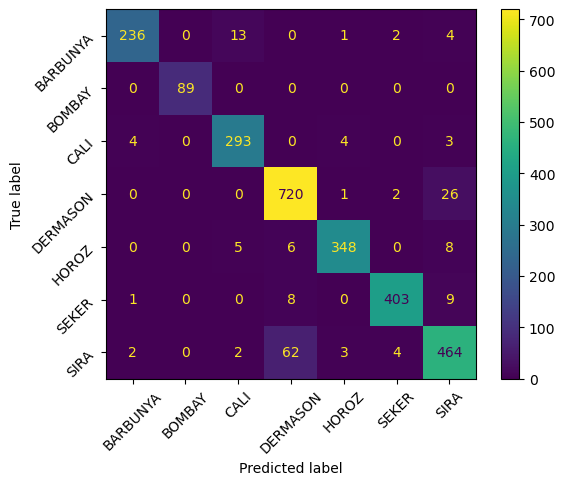

              precision    recall  f1-score   support

    BARBUNYA       0.97      0.92      0.95       256
      BOMBAY       1.00      1.00      1.00        89
        CALI       0.94      0.96      0.95       304
    DERMASON       0.90      0.96      0.93       749
       HOROZ       0.97      0.95      0.96       367
       SEKER       0.98      0.96      0.97       421
        SIRA       0.90      0.86      0.88       537

    accuracy                           0.94      2723
   macro avg       0.95      0.95      0.95      2723
weighted avg       0.94      0.94      0.94      2723



In [33]:
# calculating accuracy, precision, recall and f1 score for MLP model
ml_acc,ml_pre,ml_rec,ml_f1=predict_metrics(mlp,x_test,y_test)

In [34]:
from sklearn.model_selection import ShuffleSplit
from scipy.stats import randint
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=1)
#defining parameters
param_grid = {
    'hidden_layer_sizes':randint(5,8),
    'activation': ['identity','logistic','tanh','relu'],
    'solver': ['lbfgs','sgd','adam'],
    'learning_rate':['constant','invscaling','adaptive'],
     'random_state':randint(2,8)}
#optimizing the parameters
gridSearch = RandomizedSearchCV(mlp, n_iter=30, param_distributions=param_grid, scoring='accuracy', n_jobs=-1,
                                 cv=5, verbose=2, random_state=12)
gridSearch.fit(x_train, y_train)
print('Score: ', gridSearch.best_score_)
print('Parameters: ', gridSearch.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Score:  0.9290959454654282
Parameters:  {'activation': 'tanh', 'hidden_layer_sizes': 6, 'learning_rate': 'constant', 'random_state': 4, 'solver': 'lbfgs'}


# Optimized Multi layer Perceptron

In [35]:
#creating optimized model
mlp_op = MLPClassifier(hidden_layer_sizes=6,random_state=4,solver='lbfgs',learning_rate='constant',activation='tanh')
#fitting the model
mlp_op.fit(x_train,y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=6, random_state=4,
              solver='lbfgs')

Accuracy:  0.9313257436650753
Precision:  0.9455290424886277
Recall:  0.9392824223627362
F1 Score:  0.9421072518268625


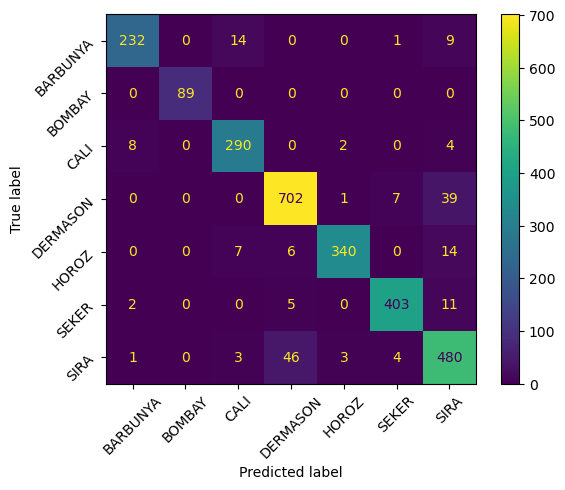

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.91      0.93       256
      BOMBAY       1.00      1.00      1.00        89
        CALI       0.92      0.95      0.94       304
    DERMASON       0.92      0.94      0.93       749
       HOROZ       0.98      0.93      0.95       367
       SEKER       0.97      0.96      0.96       421
        SIRA       0.86      0.89      0.88       537

    accuracy                           0.93      2723
   macro avg       0.95      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [36]:
# calculating accuracy, precision, recall and f1 score for optimized MLP model
ml_op_acc,ml_op_pre,ml_op_rec,ml_op_f1=predict_metrics(mlp_op,x_test,y_test)

In [37]:
#performing KFold cross validation
KFold_cross_val(mlp,x_test,y_test)

F1 score of MLPClassifier(random_state=5) is [0.94241553 0.94645356 0.94127591 0.93988379 0.92296877] 


# K nearest Neighbors

In [38]:
from sklearn.neighbors import KNeighborsClassifier
#leaf= list(range(1,50))
#n = list(range(1,30))
# creating k nearest neighbors model
knn = KNeighborsClassifier()
#fitting the model
knn.fit(x_train,y_train)

KNeighborsClassifier()

Accuracy:  0.922879177377892
Precision:  0.9400015725881589
Recall:  0.9316908603802235
F1 Score:  0.9353685058581045


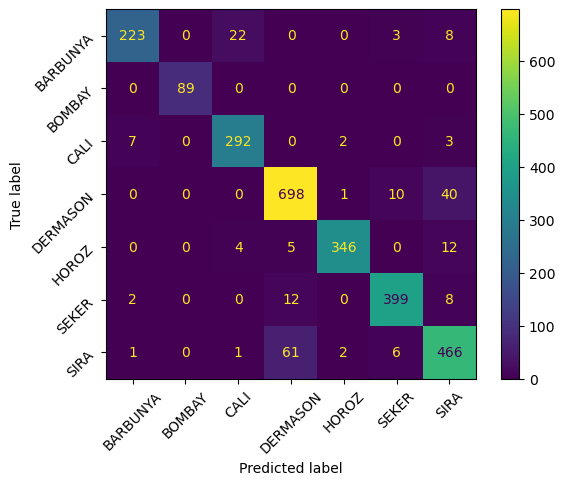

              precision    recall  f1-score   support

    BARBUNYA       0.96      0.87      0.91       256
      BOMBAY       1.00      1.00      1.00        89
        CALI       0.92      0.96      0.94       304
    DERMASON       0.90      0.93      0.92       749
       HOROZ       0.99      0.94      0.96       367
       SEKER       0.95      0.95      0.95       421
        SIRA       0.87      0.87      0.87       537

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.94      2723
weighted avg       0.92      0.92      0.92      2723



In [39]:
# calculating accuracy, precision, recall and f1 score for k nearest neighbors model
knn_acc,knn_pre,knn_rec,knn_f1=predict_metrics(knn,x_test,y_test)

In [40]:
from sklearn.model_selection import ShuffleSplit
from scipy.stats import randint

cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=1)
#defining parameters
param_grid = {
              "weights" : ['uniform', 'distance'],
              "metric" : ['euclidean', 'manhattan', 'minkowski'],
              "n_neighbors":[5, 10, 12,13 ,15]}
#optimizing the parameters
gridSearch = RandomizedSearchCV(knn, n_iter=30, param_distributions=param_grid, scoring='accuracy', n_jobs=-1,
                                 cv=5, verbose=2, random_state=12)
gridSearch.fit(x_train, y_train)
print('Score: ', gridSearch.best_score_)
print('Parameters: ', gridSearch.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Score:  0.9254216698238915
Parameters:  {'weights': 'distance', 'n_neighbors': 12, 'metric': 'euclidean'}


# optimized K nearest Neighbors

In [41]:
#creating optimized k nearest neighbors model
knn_op_class= KNeighborsClassifier(n_neighbors=12,weights='distance',metric='euclidean')
knn_op_class.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=12, weights='distance')

Accuracy:  0.9272860815277267
Precision:  0.9431152443176363
Recall:  0.9332613847299414
F1 Score:  0.9375432135320665


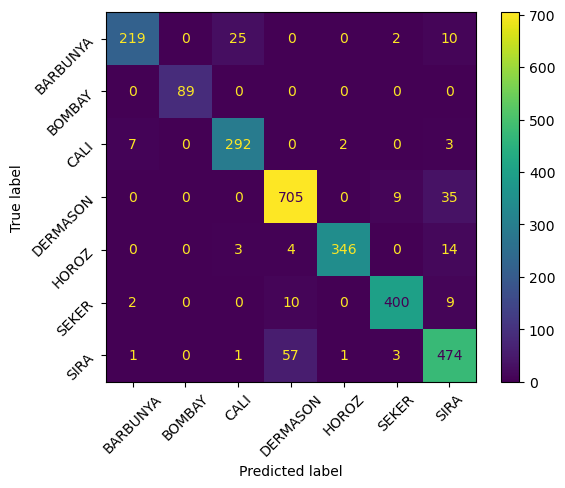

              precision    recall  f1-score   support

    BARBUNYA       0.96      0.86      0.90       256
      BOMBAY       1.00      1.00      1.00        89
        CALI       0.91      0.96      0.93       304
    DERMASON       0.91      0.94      0.92       749
       HOROZ       0.99      0.94      0.97       367
       SEKER       0.97      0.95      0.96       421
        SIRA       0.87      0.88      0.88       537

    accuracy                           0.93      2723
   macro avg       0.94      0.93      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [42]:
# calculating accuracy, precision, recall and f1 score for optimized k nearest neighbors model
knn_op_acc,knn_op_pre,knn_op_rec,knn_op_f1=predict_metrics(knn_op_class,x_test,y_test)

In [43]:
#performing KFold cross validation on model
KFold_cross_val(knn_op_class,x_test,y_test)

F1 score of KNeighborsClassifier(metric='euclidean', n_neighbors=12, weights='distance') is [0.93604693 0.92854803 0.91837944 0.93904589 0.93599652] 


# Performance Evaluation

In [44]:
metricdf=[[ml_acc,ml_pre,ml_rec,ml_f1],[ml_op_acc,ml_op_pre,ml_op_rec,ml_op_f1],[knn_acc,knn_pre,knn_rec,knn_f1],[knn_op_acc,knn_op_pre,knn_op_rec,knn_op_f1]]
#Creating dataframe with performance value
evaluation_df = pd.DataFrame(metricdf,columns=['Accuracy','Precision','Recall','F1_score'], index=['ML Perceptron', 'ML Perceptron optimized','K nearest neighbours','K nearest neighbours optimized'])
evaluation_df

,Accuracy,Precision,Recall,F1_score
ML Perceptron,0.937569,0.952838,0.945215,0.948676
ML Perceptron optimized,0.931326,0.945529,0.939282,0.942107
K nearest neighbours,0.922879,0.940002,0.931691,0.935369
K nearest neighbours optimized,0.927286,0.943115,0.933261,0.937543


[Text(0, 0, 'ML Perceptron'),
 Text(1, 0, 'ML Perceptron optimized'),
 Text(2, 0, 'K nearest neighbours'),
 Text(3, 0, 'K nearest neighbours optimized')]

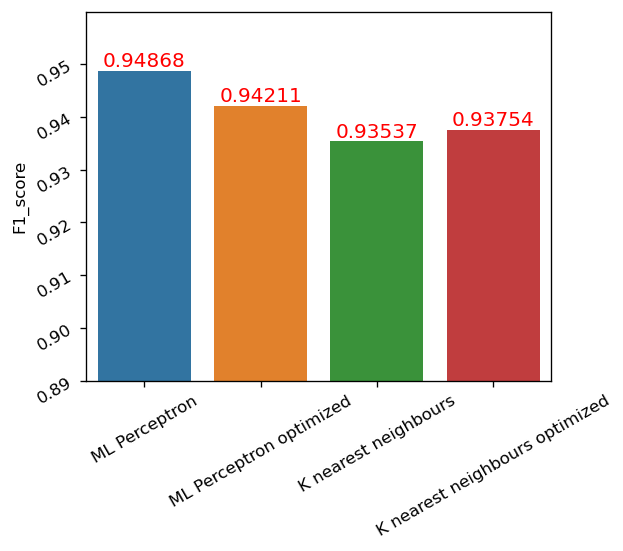

In [52]:
fig, ax = plt.subplots(1, figsize=(5,4 ), dpi=120)
ax.tick_params(axis='both', rotation=30)
cplot = sns.barplot(x=evaluation_df.index.values,y=evaluation_df['F1_score'], ax=ax)
axe = plt.gca()
plt.ylim(0.8899,0.9599)
for p in axe.patches:
    axe.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.5f}'.format(p.get_height()), 
        fontsize=12, color='red', ha='center', va='bottom')
cplot.set_xticklabels(cplot.get_xticklabels(), rotation = 30)

In [53]:
test_df=pd.DataFrame({'ID': ids_test})
test_df

,ID
2894,2894
3683,3683
8012,8012
199,199
13545,13545
...,...
13551,13551
13260,13260
6281,6281
6876,6876


In [54]:
test_df['Predicted Label'] = la_en.inverse_transform(mlp_pred)
test_df
#test_df['ID']=ids_test
test_df

,ID,Predicted Label
2894,2894,BARBUNYA
3683,3683,BOMBAY
8012,8012,SIRA
199,199,SEKER
13545,13545,SIRA
...,...,...
13551,13551,SIRA
13260,13260,DERMASON
6281,6281,HOROZ
6876,6876,HOROZ


# Saving the ouput of mlp model

In [55]:
test_df[['ID', 'Predicted Label']].to_csv('test_output.csv',index=False)